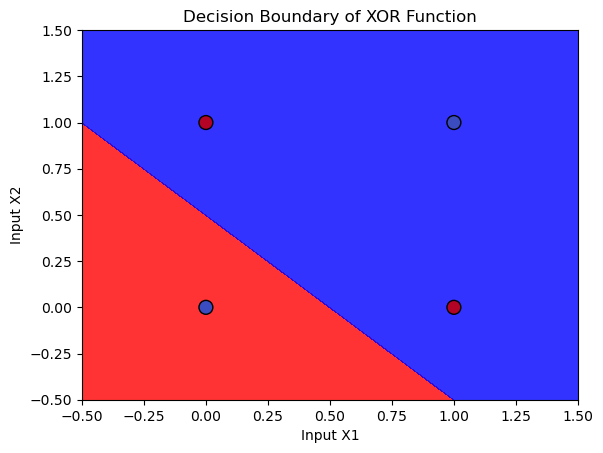

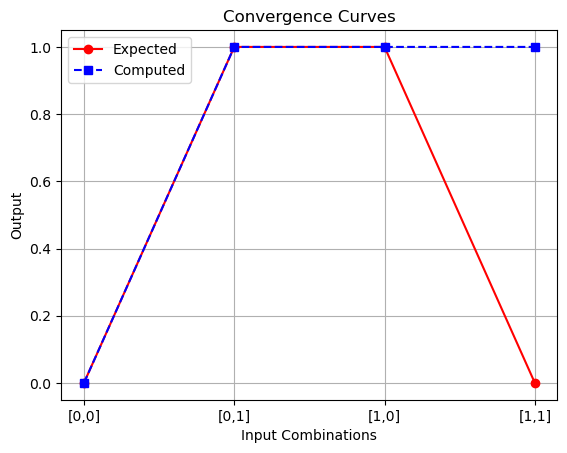

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Activation function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# XOR function using McCulloch-Pitts neurons
def xor_mc_neuron(x1, x2):
    # Define weights and biases for hidden layer
    w11, w12, b1 = 1, 1, -0.5  # First neuron in hidden layer (AND-like)
    w21, w22, b2 = 1, 1, -1.5  # Second neuron in hidden layer (NAND-like)

    # Define weights and bias for output layer
    w3, w4, b3 = 1, 1, -0.5  # OR-like neuron

    # Hidden layer computations
    h1 = step_function(w11 * x1 + w12 * x2 + b1)  # Output of first hidden neuron
    h2 = step_function(w21 * x1 + w22 * x2 + b2)  # Output of second hidden neuron

    # Output layer computation
    y = step_function(w3 * h1 + w4 * h2 + b3)  # XOR output

    return y

# Plot decision boundaries
def plot_decision_boundary():
    # Create a meshgrid
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    # Evaluate the XOR function on each point in the grid
    z = np.array([xor_mc_neuron(x, y) for x, y in zip(np.ravel(xx), np.ravel(yy))])
    z = z.reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, z, alpha=0.8, levels=[-1, 0, 1], colors=['red', 'blue'])
    plt.scatter([0, 0, 1, 1], [0, 1, 0, 1], c=[0, 1, 1, 0], edgecolors='k', cmap='coolwarm', s=100, marker='o')
    plt.title('Decision Boundary of XOR Function')
    plt.xlabel('Input X1')
    plt.ylabel('Input X2')
    plt.show()

# Plot convergence curves for XOR
def plot_convergence():
    # XOR inputs and expected outputs
    inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    expected_outputs = np.array([0, 1, 1, 0])

    # Compute the outputs
    outputs = [xor_mc_neuron(x1, x2) for x1, x2 in inputs]

    # Plotting convergence
    plt.plot(range(1, 5), expected_outputs, 'ro-', label='Expected')
    plt.plot(range(1, 5), outputs, 'bs--', label='Computed')
    plt.xticks(range(1, 5), ['[0,0]', '[0,1]', '[1,0]', '[1,1]'])
    plt.title('Convergence Curves')
    plt.xlabel('Input Combinations')
    plt.ylabel('Output')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function
if __name__ == "__main__":
    plot_decision_boundary()
    plot_convergence()
